In [3]:
#Data Science Project - Yelp Reviews - Part 2/2
#RQ2: Are Yelp users consistent across different areas?
#Focus on one particular type of business (e.g. fast food restaurant, pub, lounge, etc) and
#compare the empirical distributions of the ratings for this category across two different
#metropolitan areas. Discuss differences and similarities between the distributions and their
#main statistical properties (e.g., mean, standard deviation, skewness, etc)

import pandas as pd
%matplotlib inline
import json



from matplotlib import style
style.use('dark_background')
print(pd.__version__)

1.2.1


In [4]:
df_rev = pd.read_json('yelp_academic_dataset_review.json', lines=True , orient='columns')

In [5]:
df_bus = pd.read_json('yelp_academic_dataset_business.json', lines=True , orient='columns')

In [6]:
bus_short=df_bus[["categories","business_id","city","state","review_count"]] #taking 3 columns from the business.json dataframe
rev_short=df_rev[["business_id","user_id"]] #taking 3 columns from the review.json dataframe

In [33]:
#filter specific rows from a DataFrame 
lv1 = bus_short[bus_short["city"] == 'Las Vegas']
lv2 = bus_short[bus_short["city"] == 'Edinburgh']
#Now I want to find the empirical PDF of the number of reviews received for the individual business in LA

In [10]:
del df_rev

In [34]:
lv1.head()

,categories,business_id,city,state,review_count
8420,"[Doctors, Medical Centers, Health & Medical, F...",F7l0UuTvf_734UMAwsJfkg,Las Vegas,NV,4
8426,"[Books, Mags, Music & Video, Shopping, Booksto...",uzztTCsg3XAKlYqmLO40aw,Las Vegas,NV,20
8439,"[Home Services, Real Estate, Apartments]",YWLO4XUYsyMyEc0ciUAp0Q,Las Vegas,NV,11
8445,"[Women's Clothing, Men's Clothing, Fashion, Sh...",IspFZDcpu9W5NvvJ7QgJZg,Las Vegas,NV,8
8450,"[Hair Salons, Beauty & Spas]",Dvulg9cc3XHkt5DkBUekhw,Las Vegas,NV,17


In [35]:
lv2.head()

,categories,business_id,city,state,review_count
33494,"[Food, Specialty Food, Seafood Markets]",W3THJEcoHZZKgdJJdiFIWw,Edinburgh,EDH,3
33495,"[Gastropubs, Bars, Scottish, Nightlife, Restau...",aFVO6hoFlOCN8pKsmJbWjw,Edinburgh,EDH,44
33496,"[Food, Specialty Food, Seafood Markets]",7Iuq-HV4iA5InilfGdjMuw,Edinburgh,EDH,3
33497,"[Pubs, Bars, Nightlife]",2LZtHTbbN5xA3PcPzFsXlQ,Edinburgh,EDH,34
33498,"[British, Restaurants]",f_adZ5jM1k9uABuleJmGpw,Edinburgh,EDH,4


In [45]:
#now we want to filter for a particular type of business in both of these areas but the issue is that categories column is a string   
#To do that we are going to use the below command for our dataframes
lv1new = lv1[lv1['categories'].str.contains('Fast Food', regex=False)] #fast approach

print(lv1new)
lv1new.head()

                                              categories  \
8817   [Burgers, American (Traditional), Fast Food, R...   
9108                [Fast Food, Sandwiches, Restaurants]   
9167                [Fast Food, Sandwiches, Restaurants]   
9183                            [Fast Food, Restaurants]   
9205             [Fast Food, Chicken Wings, Restaurants]   
...                                                  ...   
85322  [Food, Ice Cream & Frozen Yogurt, Fast Food, R...   
85355  [Food, American (Traditional), Street Vendors,...   
85391                  [Fast Food, Mexican, Restaurants]   
85427  [Food, Bakeries, Coffee & Tea, Fast Food, Rest...   
85867  [Food, Fast Food, Asian Fusion, Poke, Restaura...   

                  business_id       city state  review_count  
8817   l6QcUE8XXLrVH6Ydm4GSNw  Las Vegas    NV            12  
9108   R5e2XWtpa_CA77MIXEyCTg  Las Vegas    NV             8  
9167   N2tjtB2hb0rrEQM9503qEg  Las Vegas    NV             6  
9183   idvjjh3yCDu7Hupzl89i

,categories,business_id,city,state,review_count
8817,"[Burgers, American (Traditional), Fast Food, R...",l6QcUE8XXLrVH6Ydm4GSNw,Las Vegas,NV,12
9108,"[Fast Food, Sandwiches, Restaurants]",R5e2XWtpa_CA77MIXEyCTg,Las Vegas,NV,8
9167,"[Fast Food, Sandwiches, Restaurants]",N2tjtB2hb0rrEQM9503qEg,Las Vegas,NV,6
9183,"[Fast Food, Restaurants]",idvjjh3yCDu7Hupzl89iQw,Las Vegas,NV,3
9205,"[Fast Food, Chicken Wings, Restaurants]",4jxe81SmrVLp_XDUIpXYMg,Las Vegas,NV,12


In [47]:
lv1new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 8817 to 85867
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   categories    705 non-null    object
 1   business_id   705 non-null    object
 2   city          705 non-null    object
 3   state         705 non-null    object
 4   review_count  705 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 49.2+ KB


In [43]:
lv2new = lv2[lv2['categories'].str.contains('Fast Food', regex=False)]
print(lv2new)
lv2new.head()

                                              categories  \
33526  [Food, Coffee & Tea, Fast Food, Sandwiches, Re...   
33547       [Food, Coffee & Tea, Fast Food, Restaurants]   
33580           [Bakeries, Food, Fast Food, Restaurants]   
33614       [Food, Coffee & Tea, Fast Food, Restaurants]   
33639  [Food, Do-It-Yourself Food, Coffee & Tea, Fast...   
...                                                  ...   
78558                  [Burgers, Fast Food, Restaurants]   
79768  [Food, Food Delivery Services, Fast Food, Sush...   
81029  [Food, Bubble Tea, Coffee & Tea, Fast Food, Re...   
81924           [Italian, Fast Food, Pizza, Restaurants]   
82321                  [Fast Food, Chinese, Restaurants]   

                  business_id       city state  review_count  
33526  AYobEbZ5JZ3WuEQaQnRXvQ  Edinburgh   EDH             4  
33547  VekKmagfcsfq0UOeX_7RPg  Edinburgh   EDH             4  
33580  OsupIEGpLkAXW9xIg90Ksg  Edinburgh   EDH             9  
33614  HKQe1IV-mwKqROcu0UE9

,categories,business_id,city,state,review_count
33526,"[Food, Coffee & Tea, Fast Food, Sandwiches, Re...",AYobEbZ5JZ3WuEQaQnRXvQ,Edinburgh,EDH,4
33547,"[Food, Coffee & Tea, Fast Food, Restaurants]",VekKmagfcsfq0UOeX_7RPg,Edinburgh,EDH,4
33580,"[Bakeries, Food, Fast Food, Restaurants]",OsupIEGpLkAXW9xIg90Ksg,Edinburgh,EDH,9
33614,"[Food, Coffee & Tea, Fast Food, Restaurants]",HKQe1IV-mwKqROcu0UE9WQ,Edinburgh,EDH,7
33639,"[Food, Do-It-Yourself Food, Coffee & Tea, Fast...",4ISrDLsDCi-AHOBylcgbAQ,Edinburgh,EDH,14


In [48]:
lv2new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 33526 to 82321
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   categories    170 non-null    object
 1   business_id   170 non-null    object
 2   city          170 non-null    object
 3   state         170 non-null    object
 4   review_count  170 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 8.0+ KB


In [73]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import kurtosis, skew

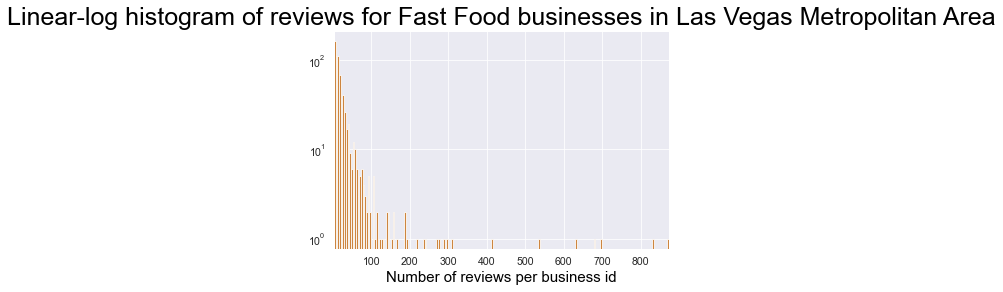

mean 33.18014184397163 standard variation 75.3604230023525
excess kurtosis of normal distribution (should be 0): 63.56970160761608
skewness of normal distribution (should be 0): 7.269149476824348


<Figure size 432x288 with 0 Axes>

In [81]:
############################################################################################################
##########RQ.2_Las Vegas_fast food / Plotting the empirical PDF in linear log for the business reviews##################
###########################################################################################################

sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)
fig, ax = plt.subplots()
# Plotting the empirical PDF in log log for the business reviews
xx1=(lv1new['review_count'])

#normalize the empirical
#x = x/len(lv['review_count'])
left_lim = min(xx1)
right_lim = max(xx1)
 
plt.hist(xx1, facecolor = 'peru', edgecolor = 'white', bins=200)
plt.xlabel('Number of reviews per business id', fontsize = 15, color= "black")
plt.title('Linear-log histogram of reviews for Fast Food businesses in Las Vegas Metropolitan Area', fontsize =25, color ="black")
plt.yscale("log")
#plt.xscale("log")
plt.xlim(left_lim,right_lim)

#plt.ylabel('Important var')

plt.show()
print ('mean', xx1.mean(), 'standard variation',xx1.std())
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(xx1) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(xx1) ))


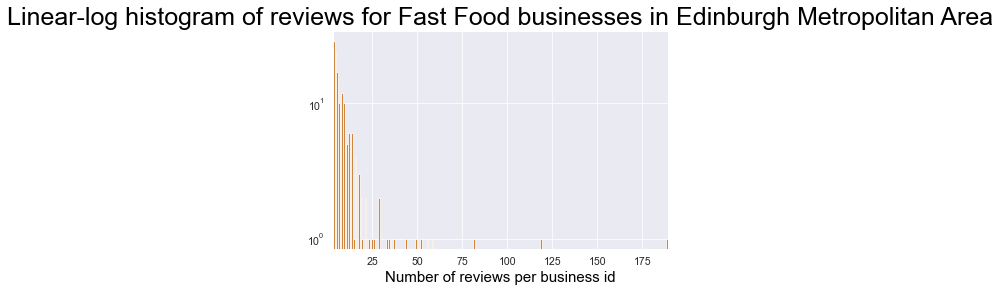

mean 12.382352941176471 standard variation 19.83782578079098
excess kurtosis of normal distribution (should be 0): 40.91171351736035
skewness of normal distribution (should be 0): 5.658176245770511


In [69]:
############################################################################################################
##########RQ.2_Edinburgh_fast food / Plotting the empirical PDF in linear log for the business reviews##################
###########################################################################################################

fig, ax = plt.subplots()
# Plotting the empirical PDF in log log for the business reviews
xx2=(lv2new['review_count'])

#normalize the empirical
#x = x/len(lv['review_count'])
left_lim = min(xx2)
right_lim = max(xx2)
 
plt.hist(xx2, facecolor = 'peru', edgecolor = 'white', bins=200)
plt.xlabel('Number of reviews per business id', fontsize = 15, color= "black")
plt.title('Linear-log histogram of reviews for Fast Food businesses in Edinburgh Metropolitan Area', fontsize =25, color ="black")
plt.yscale("log")
#plt.xscale("log")
plt.xlim(left_lim,right_lim)

#plt.ylabel('Important var')

plt.show()
print ('mean', xx2.mean(), 'standard variation',xx2.std())
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(xx2) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(xx2) ))

In [75]:
import warnings
warnings.filterwarnings("ignore")
#list_of_dists = 'weibull_min','norm','weibull_max','beta','invgauss','uniform','gamma','expon','lognorm','pearson3','triang'
list_of_dists = 'alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max'
print(type(list_of_dists))

<class 'tuple'>


In [79]:
#fitting the best continuous distribution using Kolmogorov test for evaluation
#Distribution fit for business reviews in Las Vegas for Fast food 
#https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed
results = []
for i in list_of_dists:
    dist = getattr (scipy.stats, i)
    param = dist.fit(xx1)
    a = scipy.stats.kstest(xx1, i, args=param)
    results.append((i,a[0],a[1]))
    
plt.show()

results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))
#The solution turns out to be the non central t distribution of NCF
#ncf: statistic=0.045776082256004214, pvalue=0.10100945011117435
print('parameters=', param)
#https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

ncf: statistic=0.045776082256004214, pvalue=0.10100945011117435
halfcauchy: statistic=0.0471190551380245, pvalue=0.08463523615746604
fisk: statistic=0.05052850289402139, pvalue=0.052791805613467524
nct: statistic=0.05235468453286779, pvalue=0.04044736857418918
invgamma: statistic=0.05266298236312211, pvalue=0.03863288338547066
betaprime: statistic=0.05282514344887518, pvalue=0.03770731584430964
genextreme: statistic=0.053311162116333355, pvalue=0.03504835343543056
invweibull: statistic=0.05331231455615454, pvalue=0.03504224893932417
mielke: statistic=0.05381128748109515, pvalue=0.032485133982066317
burr: statistic=0.05386954352853757, pvalue=0.03219754178922041
gilbrat: statistic=0.055202166243504686, pvalue=0.026202348185795477
johnsonsb: statistic=0.05554492181020082, pvalue=0.02482972755023405
lomax: statistic=0.05579670303905354, pvalue=0.023862397671182478
genpareto: statistic=0.05579710265022947, pvalue=0.02386088933244923
lognorm: statistic=0.05586177555113697, pvalue=0.02361789

In [78]:
#fitting the best continuous distribution using Kolmogorov test for evaluation
#Distribution fit for business reviews in Edinburgh for Fast food 
#https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed
results = []
for i in list_of_dists:
    dist = getattr (scipy.stats, i)
    param = dist.fit(xx2)
    a = scipy.stats.kstest(xx2, i, args=param)
    results.append((i,a[0],a[1]))
    
plt.show()

results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))
#The solution turns out to be the non central t distribution of NCF
#nct: statistic=0.10212563516602802, pvalue=0.05367505800006889
print('parameters=', param)
#https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

nct: statistic=0.10212563516602802, pvalue=0.05367505800006889
alpha: statistic=0.11676643801929054, pvalue=0.017797142039782558
betaprime: statistic=0.11923377789378242, pvalue=0.01456201755772124
invgamma: statistic=0.12094466731793724, pvalue=0.012639520243838393
ncf: statistic=0.12250274158208407, pvalue=0.01109087449868783
invweibull: statistic=0.12273699773893768, pvalue=0.01087346678542513
genextreme: statistic=0.12274012997957542, pvalue=0.010870586084772657
burr: statistic=0.12412066742390836, pvalue=0.00966600594320596
invgauss: statistic=0.12479934353002131, pvalue=0.009119309963821641
gilbrat: statistic=0.13087922925844137, pvalue=0.005336466153868239
loglaplace: statistic=0.1331122693443893, pvalue=0.00435495068928071
levy: statistic=0.14353448266820173, pvalue=0.001610851171390255
wald: statistic=0.1470369902208877, pvalue=0.0011337328867170443
burr12: statistic=0.15082320270595995, pvalue=0.0007681012222968802
lomax: statistic=0.1556609928817898, pvalue=0.000460272996749